# Student Depression Prediction

## Importing Necessary Libraries / Modules

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [29]:
df = pd.read_csv('Student_Depression_Dataset.csv')

In [30]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## Investigating the Dataframe

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [32]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Handling Missing Data

In [35]:
df.shape

(27901, 18)

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(27898, 18)

## Dropping the Feature "id"

In [38]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [39]:
df.drop(columns=['id'], inplace=True)

In [40]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Encoding of Categorical Features

### Pre-Investigation of Data

In [41]:
df.shape

(27898, 17)

In [42]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [43]:
categorical_list = list(df.select_dtypes(include='object').columns)

In [44]:
categorical_list

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

### Binary Mappings

In [45]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

### Ordinal Mappings

In [46]:
df['Sleep Duration'] = df['Sleep Duration'].replace({
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 4
})

In [47]:
df['Dietary Habits'] = df['Dietary Habits'].replace({
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 3
})

### One-hot Encoding for Nominal Categories

In [48]:
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree'], drop_first=True)

### Post-Investigation of Data

In [49]:
df.shape

(27898, 105)

In [50]:
df

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,...,False,False,False,False,False,False,False,False,False,False
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,0.0,5.75,5.0,0.0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
27897,0,27.0,2.0,0.0,9.40,3.0,0.0,0,2,0,...,False,False,False,False,False,False,False,True,False,False
27898,0,31.0,3.0,0.0,6.61,4.0,0.0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
27899,1,18.0,5.0,0.0,6.88,2.0,0.0,0,2,1,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Columns: 105 entries, Gender to Degree_PhD
dtypes: bool(91), float64(8), int64(6)
memory usage: 5.6 MB


In [54]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Columns: 105 entries, Gender to Degree_PhD
dtypes: float64(8), int64(97)
memory usage: 22.6 MB


In [56]:
df

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,0.0,5.75,5.0,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
27897,0,27.0,2.0,0.0,9.40,3.0,0.0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
27898,0,31.0,3.0,0.0,6.61,4.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
27899,1,18.0,5.0,0.0,6.88,2.0,0.0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

### Target variable distribution

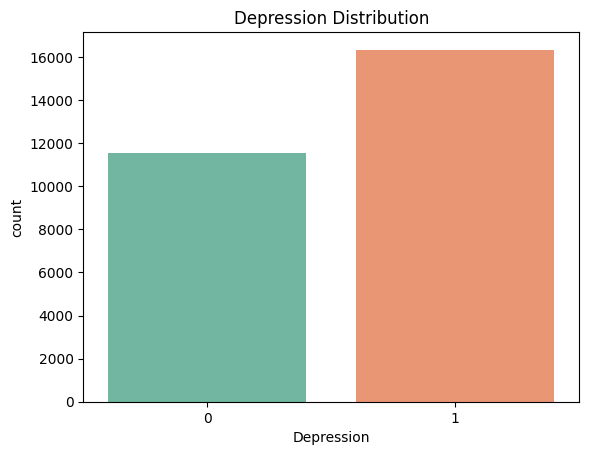

In [57]:
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title("Depression Distribution")
plt.show()

### Gender vs Depression

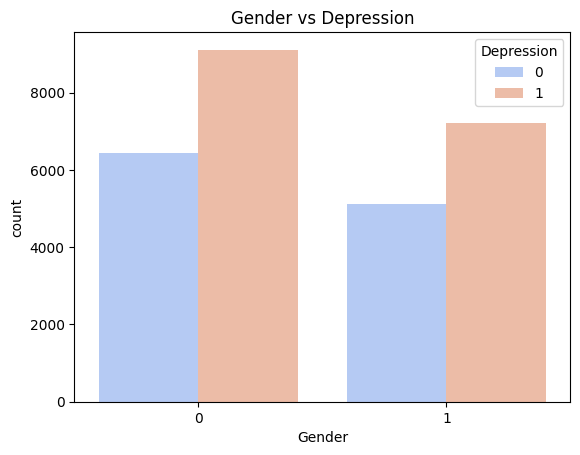

In [58]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='coolwarm')
plt.title("Gender vs Depression")
plt.show()

### Sleep Duration vs Depression

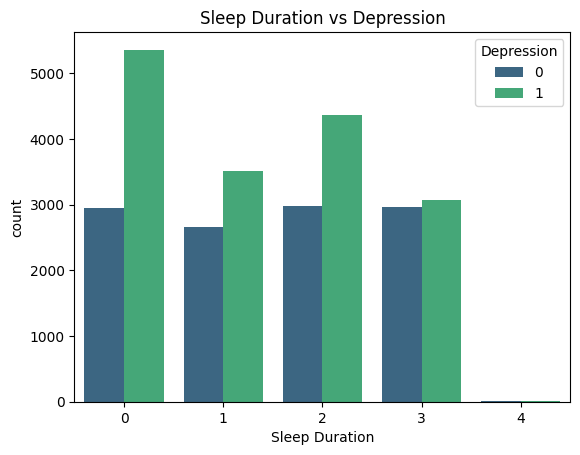

In [59]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='viridis')
plt.title("Sleep Duration vs Depression")
plt.show()

## Splitting of Dataset

In [ ]:
X = df.drop(columns=['Depression'])
y = df['Depression']

## Train-Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Searching for the Important Features 

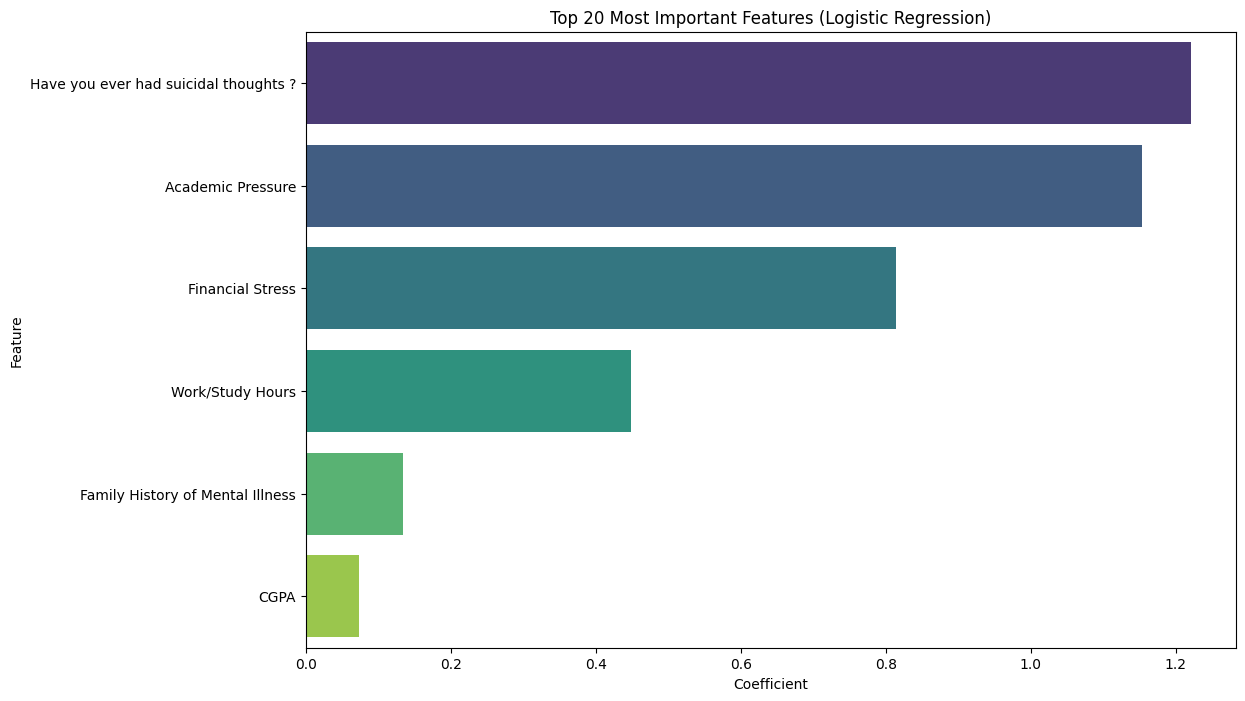

In [ ]:
# Pipeline: scaling + logistic regression
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train model
clf.fit(X_train, y_train)

# Get feature importance (coefficients from logistic regression)
feature_names = X.columns 
coefficients = clf.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot top 6 features
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(6), palette='viridis')
plt.title("Top 20 Most Important Features (Logistic Regression)")
plt.show()
